<a href="https://colab.research.google.com/github/tejasrinivas17/teja-FMML-labs/blob/main/FMML_Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Jashn Arora

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [59]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

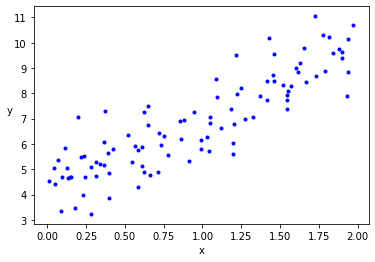

In [60]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [61]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [62]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [63]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

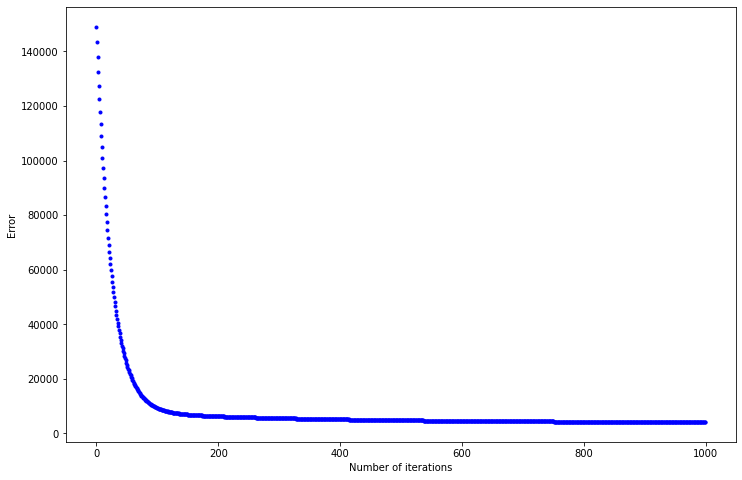

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

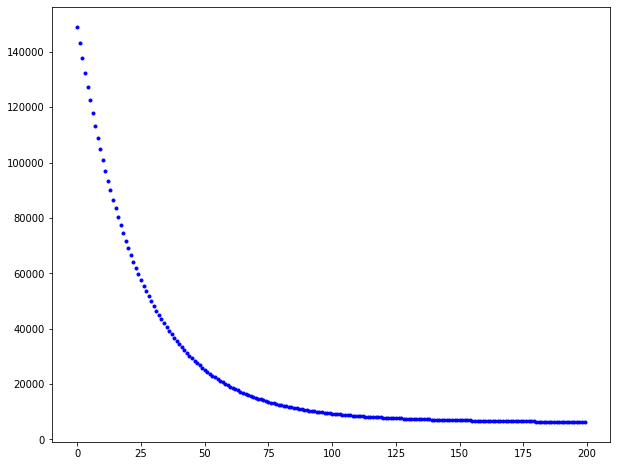

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [66]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [67]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


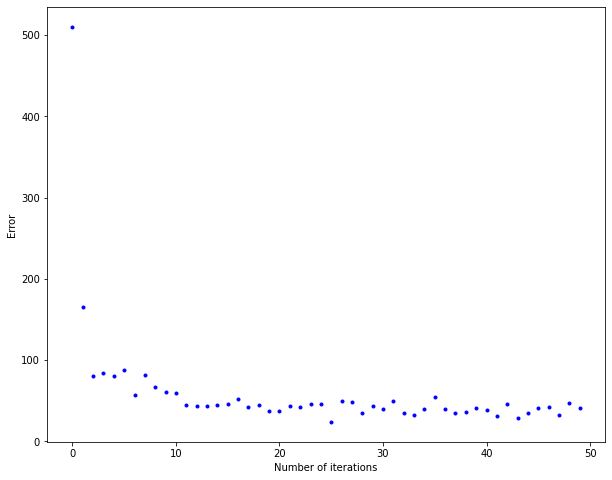

In [68]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [69]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [70]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


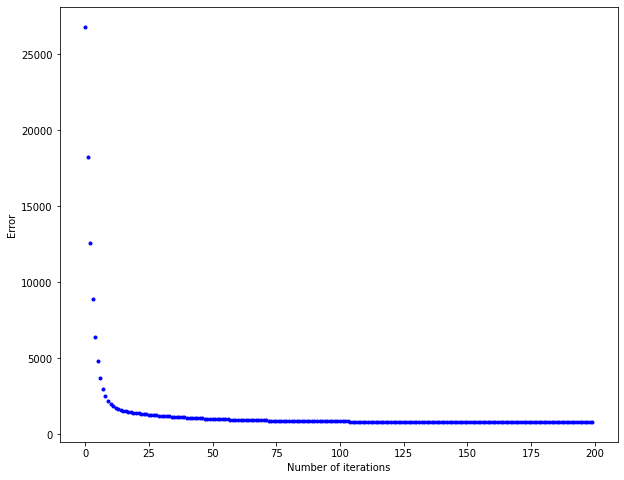

In [71]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

# ANSWER FOR 1ST QUESTION

In [72]:
lr = 0.1
n_iter = 200

cost_history_list = []

# batch size
batch_size_list = [1, 20, 40, 60, 80, 100]

for bt_size in batch_size_list:
  """
  When,
    bt_sze = 1 -> Stocastic gradient
    bt_sze = m (100) -> Batch gradient
  """
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=lr, iterations=n_iter, batch_size=bt_size)

  cost_history_list.append(cost_history)

  print(f"Batch Size = {bt_size}")
  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f}'.format(cost_history[-1]))
  print(" ")

Batch Size = 1
y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 40.253
 
Batch Size = 20
y_pred[0]: 4.188
y_pred[1]: 2.797
Final error: 806.147
 
Batch Size = 40
y_pred[0]: 4.154
y_pred[1]: 2.824
Final error: 1448.594
 
Batch Size = 60
y_pred[0]: 4.191
y_pred[1]: 2.791
Final error: 2003.070
 
Batch Size = 80
y_pred[0]: 4.231
y_pred[1]: 2.756
Final error: 2749.832
 
Batch Size = 100
y_pred[0]: 4.184
y_pred[1]: 2.797
Final error: 4034.362
 


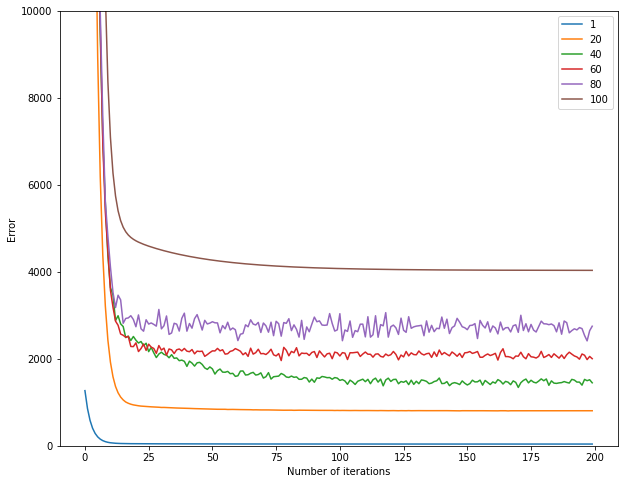

In [73]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

for bt_size, cost_history in zip(batch_size_list, cost_history_list):
  ax.plot(range(n_iter), cost_history, label=str(bt_size))

plt.ylim([0, 10000])

plt.legend()
plt.show()



# ANSWER FOR 2ND QUESTION

In [74]:
!gdown --id 1WGdO18u8FIlmUsLsak9sZ7s7Mw7mkKCz

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WGdO18u8FIlmUsLsak9sZ7s7Mw7mkKCz
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 35.2MB/s]


In [75]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
# Changing Text to numerical values
# sex 
one_hot = pd.get_dummies(df["sex"])
df = df.join(one_hot)

# smoker
one_hot = pd.get_dummies(df["smoker"])
df = df.join(one_hot)

# region
one_hot = pd.get_dummies(df["region"])
df = df.join(one_hot)

# Drop Unwanded columns
df = df.drop(["sex", "smoker", "region"], axis=1)
df.head()
     

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
df = df.sample(1000, random_state=42)
X_df = df["bmi"].to_numpy()
y_df = df["charges"].to_numpy()
     

# Standardization
std = X_df.std() 
mean = X_df.mean()
X_df = (X_df - mean) / std

std = y_df.std() 
mean = y_df.mean()
y_df = (y_df - mean) / std
X_df.shape
     
(1000,)

(1000,)

In [78]:
X_df = np.expand_dims(X_df, axis=1)
X_df.shape
     

(1000, 1)

Text(0, 0.5, 'y')

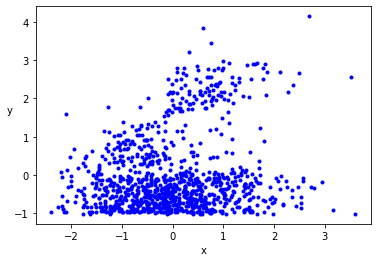

In [79]:
plt.plot(X_df, y_df, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [53]:
lr = 10e-7
n_iter = 200

cost_history_list = []

# batch size
batch_size_list = [1, 10, 100, X_df.shape[0]]

for bt_size in batch_size_list:
  """
  When,
    bt_sze = 1 -> Stocastic gradient
    bt_sze = m (100) -> Batch gradient
  """
  y_pred = np.random.randn(2, 1)
  y_pred, cost_history = minibatch_gradient_descent(X_df, y_df, y_pred, learning_rate=lr, iterations=n_iter, batch_size=bt_size)

  cost_history_list.append(cost_history)

  if bt_size == 1:
    gd_name = "Stocastic Gradient Descent"
  elif bt_size == batch_size_list[-1]:
    gd_name = "Batch Gradient Descent"
  else:
    gd_name = "Mini-Batch Gradient Descent"

  print(f"{gd_name}")
  print(f"Batch Size = {bt_size}")
  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f}'.format(cost_history[-1]))
  print("")

Stocastic Gradient Descent
Batch Size = 1
y_pred[0]: 0.774
y_pred[1]: 0.810
Final error: 971.436

Mini-Batch Gradient Descent
Batch Size = 10
y_pred[0]: -0.579
y_pred[1]: 0.866
Final error: 102601.951

Mini-Batch Gradient Descent
Batch Size = 100
y_pred[0]: 0.257
y_pred[1]: -2.727
Final error: 42456545.812

Batch Gradient Descent
Batch Size = 1000
y_pred[0]: -0.726
y_pred[1]: 1.130
Final error: 1401471535.392



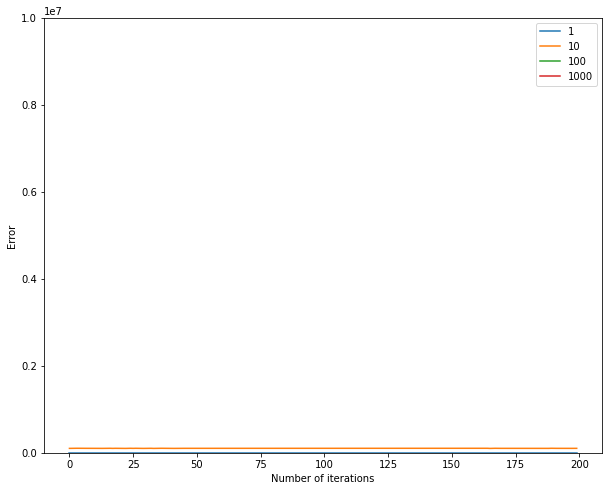

In [54]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

for bt_size, cost_history in zip(batch_size_list, cost_history_list):
  ax.plot(range(n_iter), cost_history, label=str(bt_size))

plt.ylim([0, 10e6])

plt.legend()
plt.show()

## ANSWER FOR 3RD QUESTION

In [55]:
lr_rates = [0.1, 0.01, 0.0001, 10e-4, 10e-5]
n_iter = 1000

cost_history_all = []

for lr in lr_rates:

  d = {}

  print(f"Learning Rate: {lr}")
  # Batch 
  y_pred = np.random.randn(2,1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
  d["bgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Batch GD: Final error: {:0.3f}'.format(cost_history[-1]))

  # Stocastic
  y_pred = np.random.randn(2, 1)
  X_b = np.c_[np.ones((len(X), 1)), X]
  y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
  d["sgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('SGD: Final error: {:0.3f}'.format(cost_history[-1]))


  # Mini Batch
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)
  d["mgd"] = cost_history

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
  print('Mini-Batch GD Final error: {:0.3f}'.format(cost_history[-1]))

  cost_history_all.append(d)
  print(" ")

Learning Rate: 0.1
y_pred[0]: 4.215
y_pred[1]: 2.770
Batch GD: Final error: 4032.923
y_pred[0]: 4.192
y_pred[1]: 2.760
SGD: Final error: 39.552
y_pred[0]: 4.216
y_pred[1]: 2.771
Mini-Batch GD Final error: 805.907
 
Learning Rate: 0.01
y_pred[0]: 3.824
y_pred[1]: 3.116
Batch GD: Final error: 4264.352
y_pred[0]: 4.195
y_pred[1]: 2.804
SGD: Final error: 38.205
y_pred[0]: 4.005
y_pred[1]: 2.956
Mini-Batch GD Final error: 819.726
 
Learning Rate: 0.0001
y_pred[0]: 0.083
y_pred[1]: 0.699
Batch GD: Final error: 196384.786
y_pred[0]: 1.162
y_pred[1]: 0.479
SGD: Final error: 1533.332
y_pred[0]: -0.457
y_pred[1]: 2.900
Mini-Batch GD Final error: 21523.564
 
Learning Rate: 0.001
y_pred[0]: 2.777
y_pred[1]: 3.258
Batch GD: Final error: 9238.910
y_pred[0]: 3.874
y_pred[1]: 2.313
SGD: Final error: 76.002
y_pred[0]: 2.660
y_pred[1]: 3.440
Mini-Batch GD Final error: 1820.580
 
Learning Rate: 0.0001
y_pred[0]: 1.013
y_pred[1]: 2.097
Batch GD: Final error: 78373.932
y_pred[0]: 0.460
y_pred[1]: 1.248
SGD

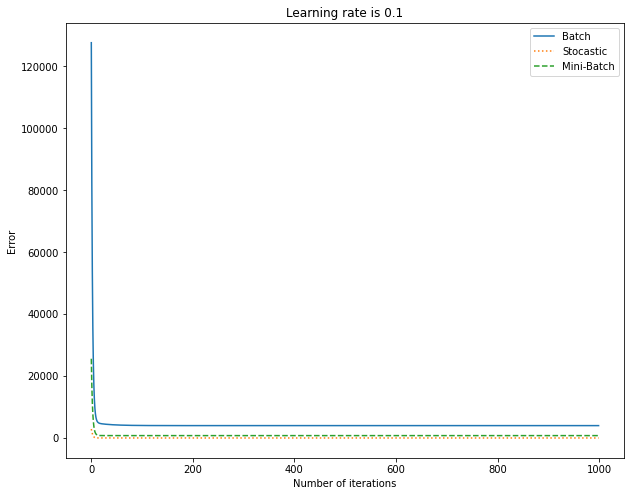

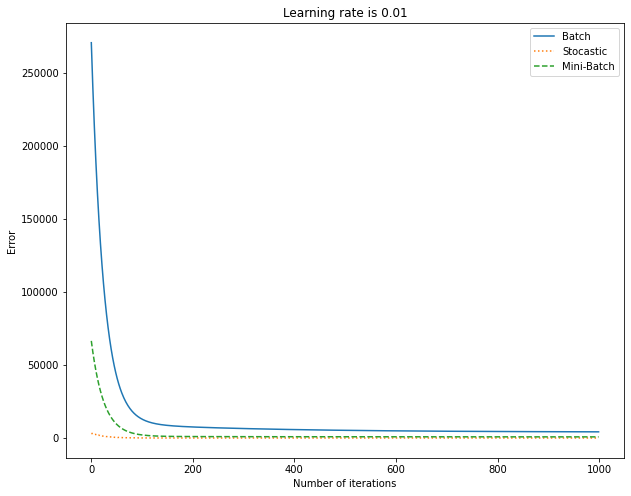

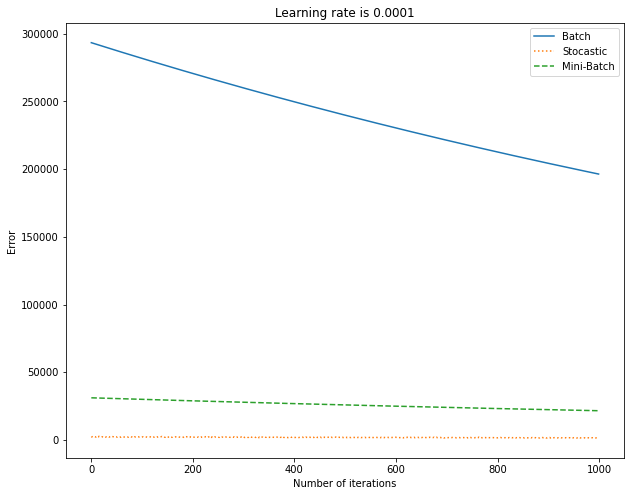

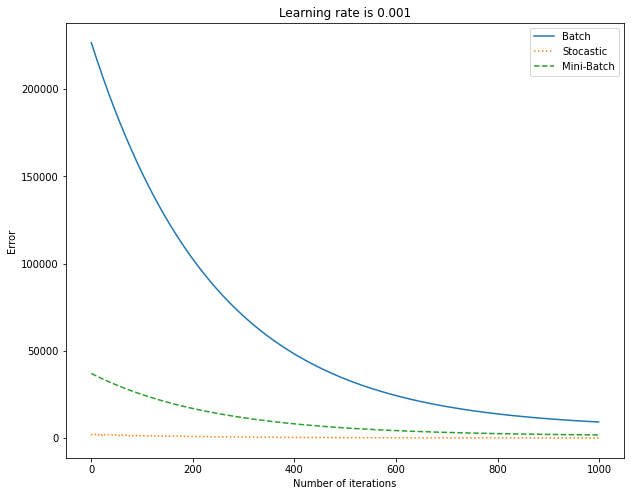

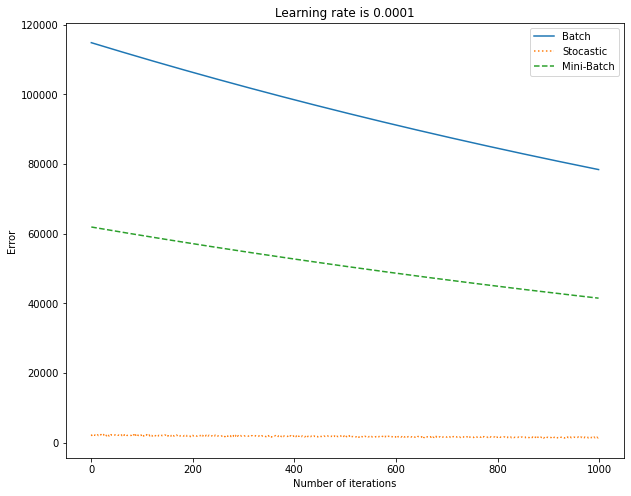

In [56]:
for lr, cost_history in zip(lr_rates, cost_history_all):
  fig, ax = plt.subplots(figsize=(10,8))

  ax.set_title(f"Learning rate is {lr}")
  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  y_pred = np.random.randn(2,1)

  ax.plot(range(n_iter), cost_history["bgd"], label="Batch", linestyle="solid")
  ax.plot(range(n_iter), cost_history["sgd"], label="Stocastic", linestyle="dotted")
  ax.plot(range(n_iter), cost_history["mgd"], label="Mini-Batch", linestyle="dashed")

  # plt.ylim([0, 10e6])

  plt.legend()
  plt.show()